<a href="https://colab.research.google.com/github/dantrainor9/Breast_Cancer_Diagnostics/blob/main/Breast_Cancer_Diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
path = '/content/drive/MyDrive/Breast cancer diagnostics/WBCdiag_02_withheader.csv'
df = pd.read_csv(path)

#**Beginning of EDA**

In [ ]:
#beginning data exploration
df.head()

,MALIG,Clump_Thick,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhes,Epit_Size,Bare_Nuclei,Bland_Chrom,Norm_Nucleoli,Mitoses
0,-1,5,1,1,1,2,1,3,1,1
1,-1,5,4,4,5,7,10,3,2,1
2,-1,3,1,1,1,2,2,3,1,1
3,-1,6,8,8,1,3,4,3,7,1
4,-1,4,1,1,3,2,1,3,1,1


In [ ]:
df.shape

(683, 10)

In [ ]:
df.describe()

,MALIG,Clump_Thick,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhes,Epit_Size,Bare_Nuclei,Bland_Chrom,Norm_Nucleoli,Mitoses
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,-0.300146,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,0.954592,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,-1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,-1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   MALIG               683 non-null    int64
 1   Clump_Thick         683 non-null    int64
 2   Uniform_Cell_Size   683 non-null    int64
 3   Uniform_Cell_Shape  683 non-null    int64
 4   Marginal_Adhes      683 non-null    int64
 5   Epit_Size           683 non-null    int64
 6   Bare_Nuclei         683 non-null    int64
 7   Bland_Chrom         683 non-null    int64
 8   Norm_Nucleoli       683 non-null    int64
 9   Mitoses             683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [ ]:
df['MALIG'].value_counts()

MALIG
-1    444
 1    239
Name: count, dtype: int64

In [ ]:
#reassigning all -1 values which indicate benign growths as 0
df['MALIG'] = np.where(df['MALIG']<0,0,df['MALIG'])

In [ ]:
#while this dataset is small, the target column has good representation of the positive class.

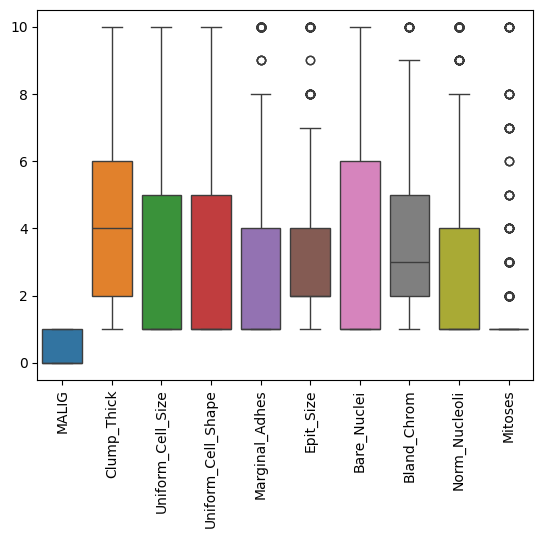

In [ ]:
sns.boxplot(data=df)
plt.xticks(rotation=90);

In [ ]:
#some outliers, but these may still be indicators of malignancy
#also not a lot of variance in some of the feature columns, 6/9 have their mininmum, 25%, and 50% at 1

In [ ]:
df.duplicated().value_counts()

False    449
True     234
Name: count, dtype: int64

In [ ]:
#lots of individuals with the same data. Interesting how close this is to the target column class split

In [ ]:
corr=df.corr()

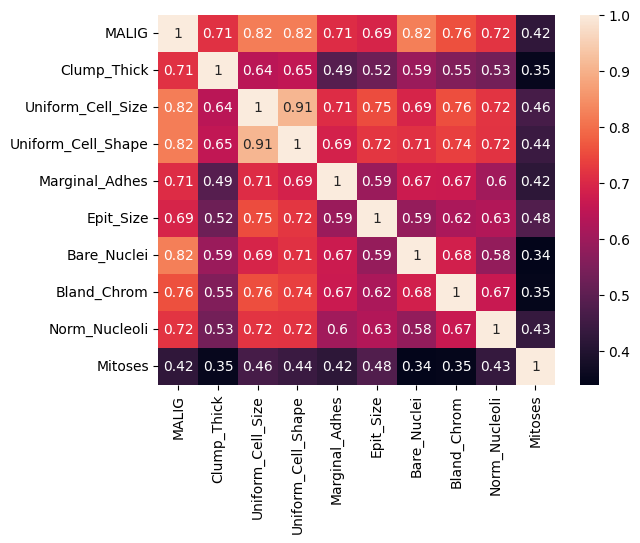

In [ ]:
sns.heatmap(data=corr,annot=True);

In [ ]:
#interesting that cell shape and size have both a very high correlation to each other and to malignancy

#**Beginning of Clustering Analysis**

In [ ]:
#scaling data for clustering algorithm
scaler = StandardScaler()

In [ ]:
df_scaled = scaler.fit_transform(df)

In [ ]:
#creating a clustering algorithm
kmeans = KMeans(n_clusters=3, max_iter=500)

In [ ]:
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=3)

In [ ]:
#visualizing clusters in scatterplots
df['cluster'] = kmeans.labels_

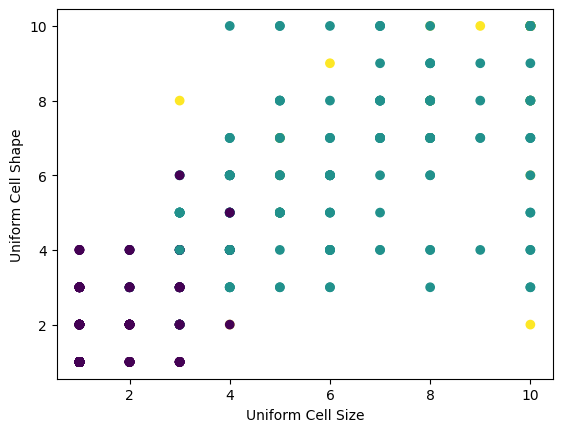

In [ ]:
plt.scatter(df['Uniform_Cell_Size'],df['Uniform_Cell_Shape'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Uniform Cell Shape');

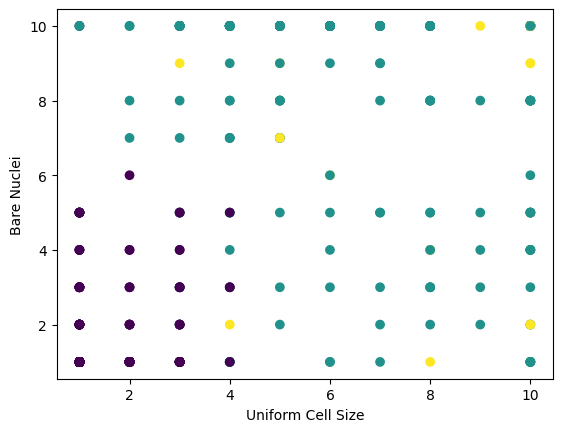

In [ ]:
plt.scatter(df['Uniform_Cell_Size'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Bare Nuclei');

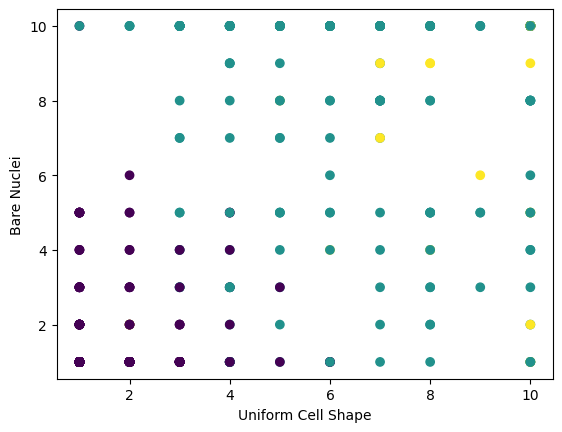

In [ ]:
plt.scatter(df['Uniform_Cell_Shape'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Shape')
plt.ylabel('Bare Nuclei');

In [ ]:
#making a function to determine ideal # of clusters
ks = range(2,20)
sil = []
inertias = []

for k in ks:
  km = KMeans(n_clusters=k)
  km.fit(df)
  sil.append(silhouette_score(df, km.labels_))
  inertias.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

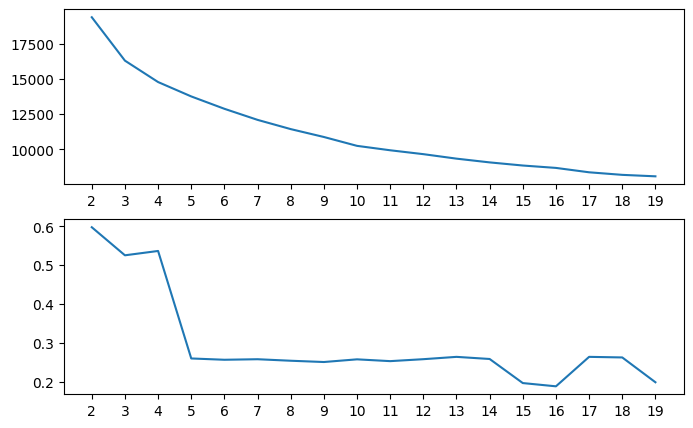

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(8,5))
axes[0].plot(ks, inertias)
axes[1].plot(ks, sil)
axes[0].set_xticks(ks)
axes[1].set_xticks(ks);
#looks like 6 clusters is a good number

In [ ]:
#reclustering with ideal number of clusters
kmeans = KMeans(n_clusters=6, max_iter=500)

In [ ]:
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=6)

In [ ]:
df['cluster'] = kmeans.labels_

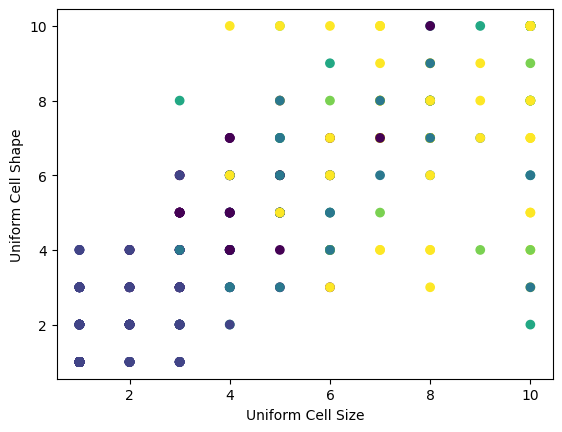

In [ ]:
plt.scatter(df['Uniform_Cell_Size'],df['Uniform_Cell_Shape'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Uniform Cell Shape');

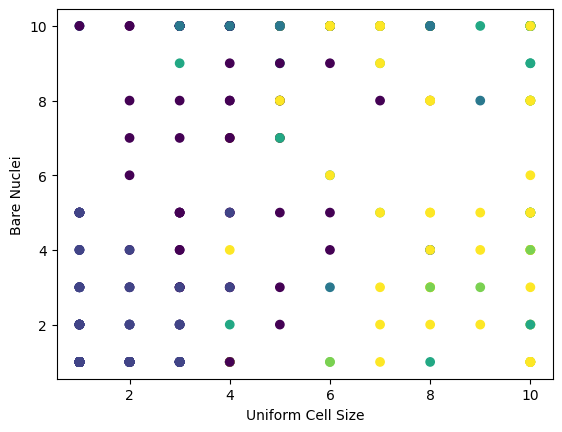

In [ ]:
plt.scatter(df['Uniform_Cell_Size'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Size')
plt.ylabel('Bare Nuclei');

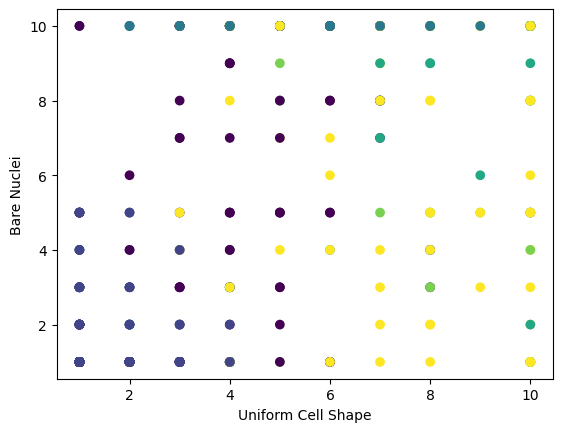

In [ ]:
plt.scatter(df['Uniform_Cell_Shape'],df['Bare_Nuclei'],c=df['cluster'])
plt.xlabel('Uniform Cell Shape')
plt.ylabel('Bare Nuclei');

In [ ]:
#scatterplots were not revealing so let's try a groupby and some other data viz to see if we can identify trends in clusters

In [ ]:
clusters = df.groupby(['cluster']).mean().reset_index()

In [ ]:
clusters.value_counts()

cluster  MALIG     Clump_Thick  Uniform_Cell_Size  Uniform_Cell_Shape  Marginal_Adhes  Epit_Size  Bare_Nuclei  Bland_Chrom  Norm_Nucleoli  Mitoses 
0        0.850746  6.805970     3.880597           4.626866            2.388060        4.029851   6.731343     4.343284     4.462687       1.641791    1
1        0.002304  2.900922     1.214286           1.317972            1.301843        2.032258   1.246544     2.032258     1.170507       1.059908    1
2        0.977273  7.022727     5.318182           5.181818            7.295455        3.704545   9.590909     5.386364     3.022727       1.568182    1
3        1.000000  7.645161     8.354839           8.322581            7.193548        7.322581   7.516129     6.677419     7.838710       8.451613    1
4        1.000000  7.882353     8.647059           8.117647            6.441176        8.735294   8.176471     6.647059     4.352941       1.882353    1
5        1.000000  6.917808     7.917808           7.561644            6.095890        

In [ ]:
#groupby looks promising

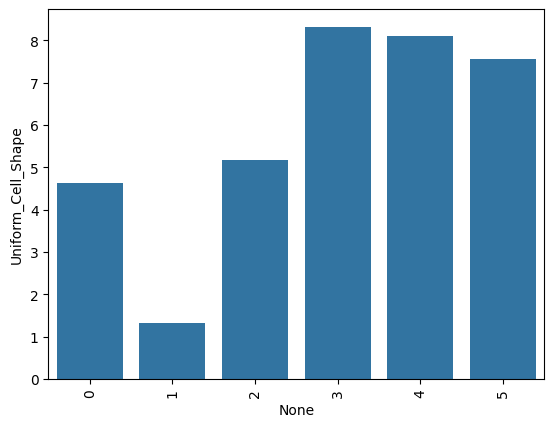

In [ ]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Uniform_Cell_Shape'])
plt.xticks(rotation=90);

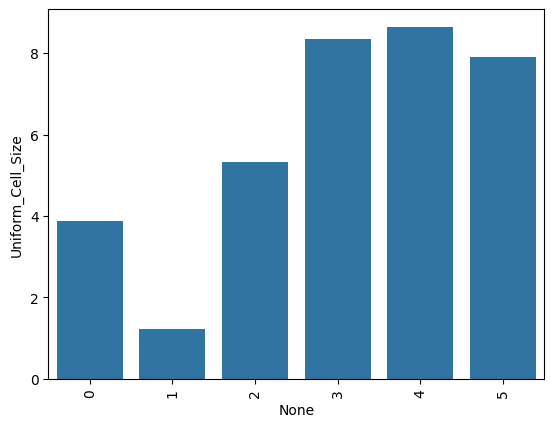

In [ ]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Uniform_Cell_Size'])
plt.xticks(rotation=90);

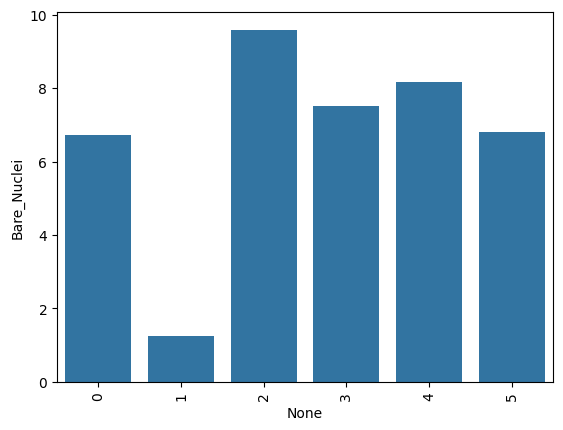

In [ ]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Bare_Nuclei'])
plt.xticks(rotation=90);

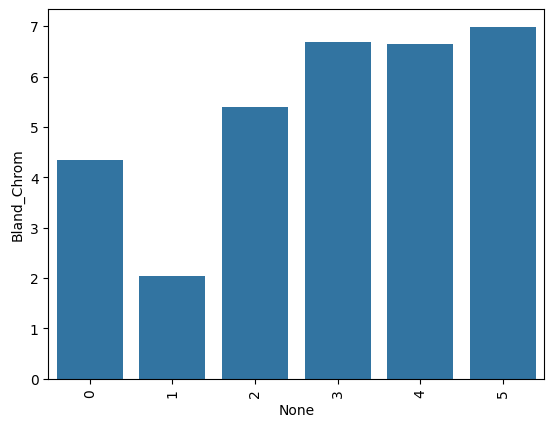

In [ ]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Bland_Chrom'])
plt.xticks(rotation=90);

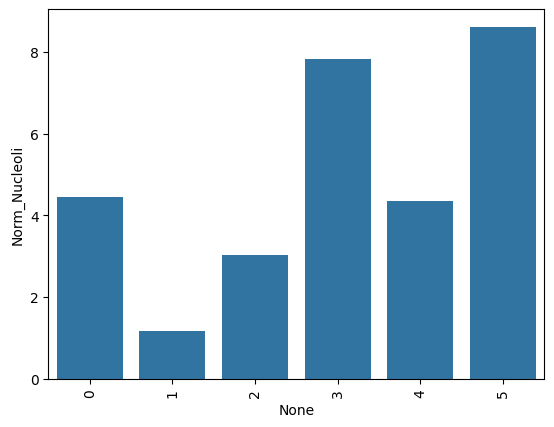

In [ ]:
sns.barplot(data=clusters,x=clusters.index, y=clusters['Norm_Nucleoli'])
plt.xticks(rotation=90);

In [ ]:
#trends area little clearer when visualizing a groupby in bar graphs

#**Beginning of Classification Modeling**

In [ ]:
#separating out target column
X = df[['Clump_Thick',
      'Uniform_Cell_Size',
      'Uniform_Cell_Shape',
      'Marginal_Adhes',
      'Epit_Size',
      'Bare_Nuclei',
      'Bland_Chrom',
      'Norm_Nucleoli',
      'Mitoses']]
y = df['MALIG']

In [ ]:
#splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#exploring train dataframe
X_train.shape

(512, 9)

In [ ]:
X_train.describe()

,Clump_Thick,Uniform_Cell_Size,Uniform_Cell_Shape,Marginal_Adhes,Epit_Size,Bare_Nuclei,Bland_Chrom,Norm_Nucleoli,Mitoses
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,4.408203,3.123047,3.234375,2.800781,3.212891,3.500000,3.341797,2.769531,1.564453
std,2.784387,3.068446,3.054583,2.830391,2.200247,3.630702,2.363778,2.957231,1.637305
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.250000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
